#   --------------------------------------(1) DATA CLEANING -----------------------------------------

# Examining the dataset

In [12]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
police = pd.read_csv("police.csv")

# Examine the head of the DataFrame
police.head(5)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [13]:
# Count the number of missing values in each column
print(police.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


# Dropping columns
Often, a DataFrame will contain columns that are not useful to our analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.

we'll drop the county_name column because it only contains missing values and we'll drop the state column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

In [14]:
# Examine the shape of the DataFrame
print(police.shape)

(91741, 15)


In [15]:
# Drop the 'county_name' and 'state' columns
police.drop(['county_name','state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(police.shape)

(91741, 13)


# Dropping rows
When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

The driver_gender column will be critical to many of your analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

In [16]:
# Count the number of missing values in each column
print(police.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [8]:
# Drop all rows that are missing 'driver_gender'
police.dropna(subset=['driver_gender'],inplace=True)

# Count the number of missing values in each column (again)
print(police.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [18]:
# Examine the shape of the DataFrame
print(police.shape)

(91741, 13)


# Finding an incorrect data type

In [19]:
print(police.dtypes)
# is_arrested should have a data type of bool

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


# Changing a data type
We saw  that the is_arrested column currently has the object data type, we'll change the data type to bool, which is the most suitable type for a column containing True and False values.

Fixing the data type will enable us to use mathematical operations on the is_arrested column that would not be possible otherwise.

In [21]:
# Examine the head of the 'is_arrested' column
print(police.is_arrested.head(5))

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [22]:
# Change the data type of 'is_arrested' to 'bool'
police['is_arrested'] = police.is_arrested.astype('bool')

# Check the data type of 'is_arrested'
print(police.is_arrested.dtypes)

bool


# Combining object columns
Currently, the date and time of each traffic stop are stored in separate object columns: stop_date and stop_time.

we'll combine these two columns into a single column, and then convert it to datetime format. This will enable convenient date-based attributes that we'll use later.

In [23]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combine = police.stop_date.str.cat(police.stop_time, sep = " ")

# Convert 'combined' to datetime format
police['stop_datetime'] = pd.to_datetime(combine)

# Examine the data types of the DataFrame
print(police.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


# Setting the index
Set the stop_datetime column as the DataFrame's index. By replacing the default index with a DatetimeIndex, we'll make it easier to analyze the dataset by date and time, which will come in handy later

In [24]:
# Set 'stop_datetime' as the index
police.set_index('stop_datetime', inplace =True)

# Examine the index
print(police.index)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=91741, freq=None)


In [25]:
# Examine the columns
print(police.columns)

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


# ---------(2)Exploring the relationship between gender and policing------------
Do the genders commit different violations?

# Examining traffic violations
Before comparing the violations being committed by each gender, we should examine the violations committed by all drivers to get a baseline understanding of the data.

we'll count the unique values in the violation column, and then separately express those counts as proportions.

In [26]:
# Count the unique values in 'violation'
print(police.violation.value_counts())

Speeding               48424
Moving violation       16224
Equipment              10922
Other                   4410
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [27]:
# Express the counts as proportions
print(police.violation.value_counts(normalize=True))

Speeding               0.559563
Moving violation       0.187476
Equipment              0.126209
Other                  0.050960
Registration/plates    0.042790
Seat belt              0.033002
Name: violation, dtype: float64


Interesting! More than half of all violations are for speeding, followed by other moving violations and equipment violations.

# Comparing violations by gender
The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

we'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [30]:
# Create a DataFrame of female drivers
female = police[police.driver_gender == 'F']

# Create a DataFrame of male drivers
male = police[police.driver_gender == 'M']

In [31]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [32]:
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

# Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can we find evidence of this in the dataset?

First, we'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, we'll use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [33]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding =police[(police.driver_gender == 'F') & (police.violation == 'Speeding')]

In [34]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = police[(police.driver_gender == 'M') & (police.violation == 'Speeding')]

In [35]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [36]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a Citation. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

# Calculating the search rate
During a traffic stop, the police officer sometimes conducts a search of the vehicle. We'll calculate the percentage of all stops in the police DataFrame that result in a vehicle search, also known as the search rate.

In [38]:
# Check the data type of 'search_conducted'
print(police.search_conducted.dtypes)

bool


In [39]:
# Calculate the search rate by counting the values
print(police.search_conducted.value_counts(normalize=True))

False    0.963953
True     0.036047
Name: search_conducted, dtype: float64


In [40]:
# Calculate the search rate by taking the mean
print(police.search_conducted.mean())

0.03604713268876511


It looks like the search rate is about 3.8%. Next, we'll examine whether the search rate varies by driver gender.

# Comparing search rates by gender
We'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, we'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a .groupby()

In [41]:
# Calculate the search rate for female drivers
print(police[police.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


In [42]:
# Calculate the search rate for male drivers
print(police[police.driver_gender =='M'].search_conducted.mean())

0.04542557598546892


In [43]:
# Calculate the search rate for both groups simultaneously
print(police.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

# Adding a second factor to the analysis
Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, we might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

In [44]:
# Calculate the search rate for each combination of gender and violation
print(police.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [46]:
# Reverse the ordering to group by violation before gender
print(police.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

# Counting protective frisks
During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

We'll first check to see how many times "Protective Frisk" was their in search type. Then, we'll use a string method to locate all instances in which the driver was frisked.

In [47]:
# Count the 'search_type' values
print(police.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [58]:
# Check if 'search_type' contains the string 'Protective Frisk'
police['frisk'] = police.search_type.str.contains('Protective Frisk',na=False)

In [59]:
# Check the data type of 'frisk'
print(police.frisk.dtypes)

bool


In [60]:
# Take the sum of 'frisk'
print(police.frisk.sum())

303


It looks like there were 303 drivers who were frisked. Next, we'll examine whether gender affects who is frisked.

# Comparing frisk rates by gender
We'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [61]:
# Create a DataFrame of stops in which a search was conducted
searched = police[police.search_conducted == True]

In [62]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.09162382824312065


In [63]:
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


Interesting! The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

# -----------------------------(3)VISUALISATION-------------------------------

# Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. we'll find out whether the arrest rate varies by time of day.

First, we'll calculate the arrest rate across all stops in the ri DataFrame. Then, we'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight
12 = noon
23 = 11 PM

In [64]:
# Calculate the overall arrest rate
print(police.is_arrested.mean())

0.09025408486936048


In [65]:
# Calculate the hourly arrest rate
print(police.groupby(police.index.hour).is_arrested.mean())

stop_datetime
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


In [66]:
# Save the hourly arrest rate
hourly_arrest_rate =police.groupby(police.index.hour).is_arrested.mean()

Next we'll plot the data so that we can visually examine the arrest rate trends.

# Plotting the hourly arrest rate
we'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because we're showing how a quantity changes over time.

This plot should help us to spot some trends that may not have been obvious when examining the raw numbers!

In [68]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

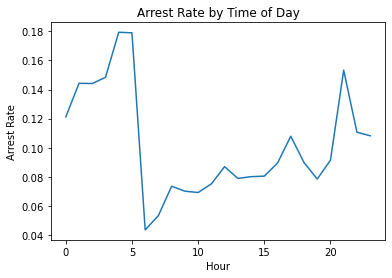

In [69]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

The arrest rate has a significant spike overnight, and then dips in the early morning hours.

# Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. we'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. we'll calculate the annual drug rate by resampling this column, and then we'll use a line plot to visualize how the rate has changed over time.

In [70]:
# Calculate the annual rate of drug-related stops
print(police.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [71]:
# Save the annual rate of drug-related stops
annual_drug_rate = police.drugs_related_stop.resample('A').mean()

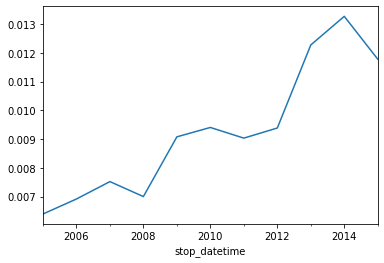

In [72]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

# Comparing drug and search rates
As we saw the rate of drug-related stops increased significantly between 2005 and 2015. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

we can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

In [73]:
# Calculate and save the annual search rate
annual_search_rate =police.search_conducted.resample('A').mean()

In [74]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

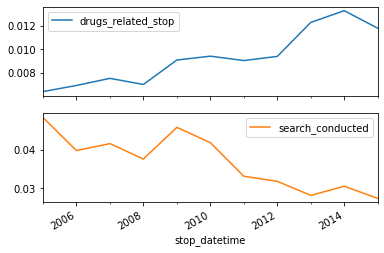

In [75]:
# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

# Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

Now, we'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, we'll filter the table to focus on the "K" zones, which we'll examine further in the next exercise.

In [76]:
# Create a frequency table of districts and violations
print(pd.crosstab(police.district,police.violation))

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [77]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(police.district,police.violation)

In [78]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  


In [79]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

 Next we'll plot the violations so that you can compare these districts.

# Plotting violations by district
Now that we've created a frequency table focused on the "K" zones, we'll visualize the data to help you compare what violations are being caught in each zone.

First we'll create a bar plot, which is an appropriate plot type since we're comparing categorical data. Then we'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

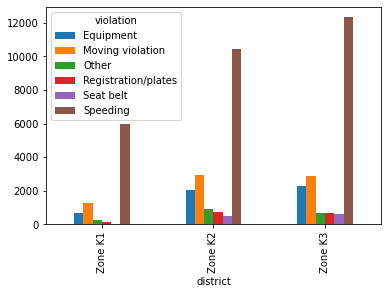

In [80]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar')

# Display the plot
plt.show()

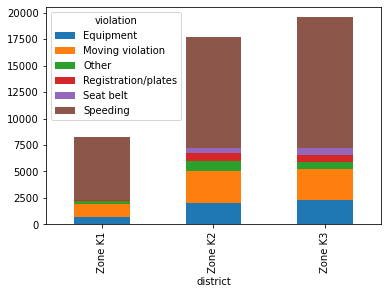

In [81]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind = 'bar', stacked =True)

# Display the plot
plt.show()

The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

# Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells us approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

Now, we'll convert the stop durations to integers. Because the precise durations are not available, we'll have to estimate the numbers using reasonable values:

Convert '0-15 Min' to 8
Convert '16-30 Min' to 23
Convert '30+ Min' to 45

In [82]:
# Print the unique values in 'stop_duration'
print(police.stop_duration.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']


In [86]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}

In [91]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
police['stop_minutes'] = police.stop_duration.map(mapping)

In [92]:
# Print the unique values in 'stop_minutes'
print(police.stop_minutes.unique())

[ 8. 23. nan 45.]


Next we'll analyze the stop length for each type of violation.

# Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

we'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column, we'll use violation_raw since it contains more detailed descriptions of the violations.

In [93]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(police.groupby('violation_raw').stop_minutes.mean())

violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


In [95]:
# Save the resulting Series as 'stop_length'
stop_length = police.groupby('violation_raw').stop_minutes.mean()

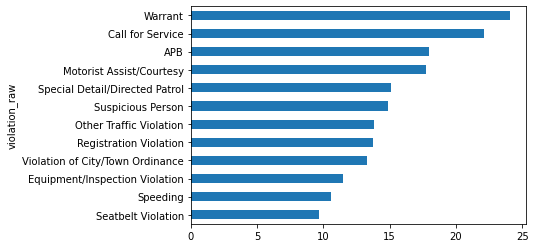

In [96]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind = 'barh')

# Display the plot
plt.show()

# --------------------(4)Analyzing the effect of weather on policing------------------------

# ADDING NEW DATASET WEATHER

# Plotting the temperature
Now, we'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First we'll print the summary statistics, and then we'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

In [99]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')

# printing the sample
weather.head(5)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [100]:
# Describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


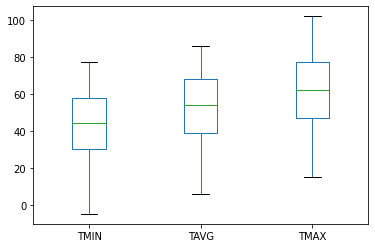

In [101]:
# Create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

# Display the plot
plt.show()

The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

# Plotting the temperature difference
Next, we'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match our expectations, or do we see anything unusual?

In [102]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

In [103]:
# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


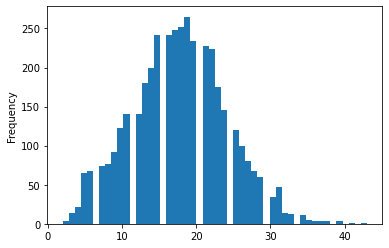

In [105]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind = 'hist' , bins=50)

# Display the plot
plt.show()

The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

# Counting bad weather conditions
The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

Next, we'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

In [107]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

In [108]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

In [109]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

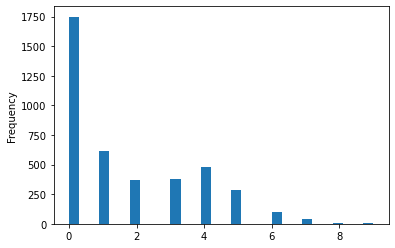

In [112]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist',bins=30)

# Display the plot
plt.show()

 It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

# Rating the weather conditions
Previously, we counted the number of bad weather conditions each day. Now, we'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

Convert 0 to 'good'
Convert 1 through 4 to 'bad'
Convert 5 through 9 to 'worse'

In [113]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [114]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 
                5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [125]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

In [116]:
# Count the unique values in 'rating'
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


This rating system should make the weather condition data easier to understand.

# Changing the data type to category
Since the rating column only has a few possible values, we'll change its data type to category in order to store the data more efficiently. we'll also specify a logical order for the categories, which will be useful for future exercises.

In [127]:
# Create a list of weather ratings in logical order
cats = ['good','bad','worse']

In [131]:
# Change the data type of 'rating' to category
weather['rating'] = pd.Categorical(weather['rating'], categories=cats, ordered=True)

In [132]:
# Examine the head of 'rating'
weather.rating.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

We'll use the rating column to analyze the effects of weather on police behavior.

# Preparing the DataFrames
Next we'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

With the ri DataFrame, we'll move the stop_datetime index to a column since the index will be lost during the merge.
With the weather DataFrame, we'll select the DATE and rating columns and put them in a new DataFrame.

In [133]:
# Reset the index of 'police'
police.reset_index(inplace = True)

In [134]:
# Examine the head of 'ri'
police.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8.0
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8.0
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23.0
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8.0


In [135]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

In [136]:
# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


The ri and weather_rating DataFrames are now ready to be merged.

# Merging the DataFrames
Next, yowe'll merge the ri and weather_rating DataFrames into a new DataFrame, police_weather.

The DataFrames will be joined using the stop_date column from police and the DATE column from weather_rating. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, we'll set stop_datetime as the index.

In [137]:
# Examine the shape of 'police'
print(police.shape)

(91741, 16)


In [138]:
# Merge 'ri' and 'weather_rating' using a left join
police_weather = pd.merge(left=police, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [139]:
# Examine the shape of 'ri_weather'
print(police_weather.shape)

(91741, 18)


In [140]:
# Set 'stop_datetime' as the index of 'ri_weather'
police_weather.set_index('stop_datetime', inplace=True)

 Next, we'll use ri_weather to analyze the relationship between weather conditions and police behavior.

# Comparing arrest rates by weather rating
Do police officers arrest drivers more often when the weather is bad? Find out below!

First, we'll calculate the overall arrest rate.
Then, we'll calculate the arrest rate for each of the weather ratings we previously assigned.
Finally, we'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.
Since we previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.

In [141]:
# Calculate the overall arrest rate
print(police_weather.is_arrested.mean())

0.09025408486936048


In [142]:
# Calculate the arrest rate for each 'rating'
print(police_weather.groupby('rating').is_arrested.mean())

rating
good     0.086842
bad      0.090479
worse    0.106527
Name: is_arrested, dtype: float64


In [144]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(police_weather.groupby(['violation','rating']).is_arrested.mean())

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!